
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
[Tip]: To execute the Python code in the code cell below, click on the cell to select it and press <kbd>Shift</kbd> + <kbd>Enter</kbd>.
</div>



# Exercise 3: Logistic Regression using Gradient Descent for University Admittance, Microchip Fabrication and Sentiment Analysis

## Due Date: 21.12.23

## Introduction

In this exercise, you will implement (non-linear, regularized) logistic regression using gradient descent and apply it to three different datasets:
- University Admittance Data
- Microchip Fabrication Data
- Sentiment Analysis Data

To run this notebook you should have the following Python packages installed:
* `numpy`
* `matplotlib`
* `sklearn`
* `scipy`
* `pandas`
* `wbi_teaching_applied_ml_utils`


**The notebook contains 10 tasks for you to solve.**

University Admittance Data and Logistic Regression
- Task 1: Compute the Sigmoid Function
- Task 2: Compute the Hypothesis Function
- Task 3: Cost Function and the Gradient
- Task 4: Gradient Descent
- Task 5: Sensitivity to the Learning Rate

SciPy Optimize and Logistic Regression
- Task 6: Evaluating Logistic Regression

Microchip Fabrication - Regularized Logistic Regression
- Task 7: Cost Function and Gradient
- Task 8: Effects of Lambda

Sentiment Analysis using Logistic Regression
- Task 9: Fitting a Logistic Regression Model to the Training Data
- Task 10: Words with large Influence on the Prediction

**Solving a task gives one point. Over all exercises you should obtain 50% of the points to pass.**


## Submission 

Hand in this assignment via Moodle.

## We will first install the required libraries

In [1]:
# install utility functions
# install utility functions
import sys
!{sys.executable} -m pip install --upgrade wbi_teaching_applied_ml_utils

# uncomment the below lines, if needed
# !{sys.executable} -m pip install sklearn

# University Admittance Data

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. 

For each training example, you have the applicant’s scores on two exams and the admissions
decision $y=\{0,1\}$. 

Your task is to build a logistic regression classification model that estimates an applicant’s probability of admission based the scores from those two exams. 

In [2]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

from scipy import optimize
from sklearn.preprocessing import StandardScaler

from wbi_teaching_applied_ml_utils import Exercise3Utils as utils

The following cell will load the data and corresponding labels:

In [3]:
X, y, _ = utils.load_exam_data()

## Visualizing the data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible. We  display the data on a 2-dimensional plot by calling the function `plotData`. It displays a figure where the axes are the two exam scores, and the positive $y=1$ (admitted) and negative $y=0$ (not admitted) examples are shown with different markers.

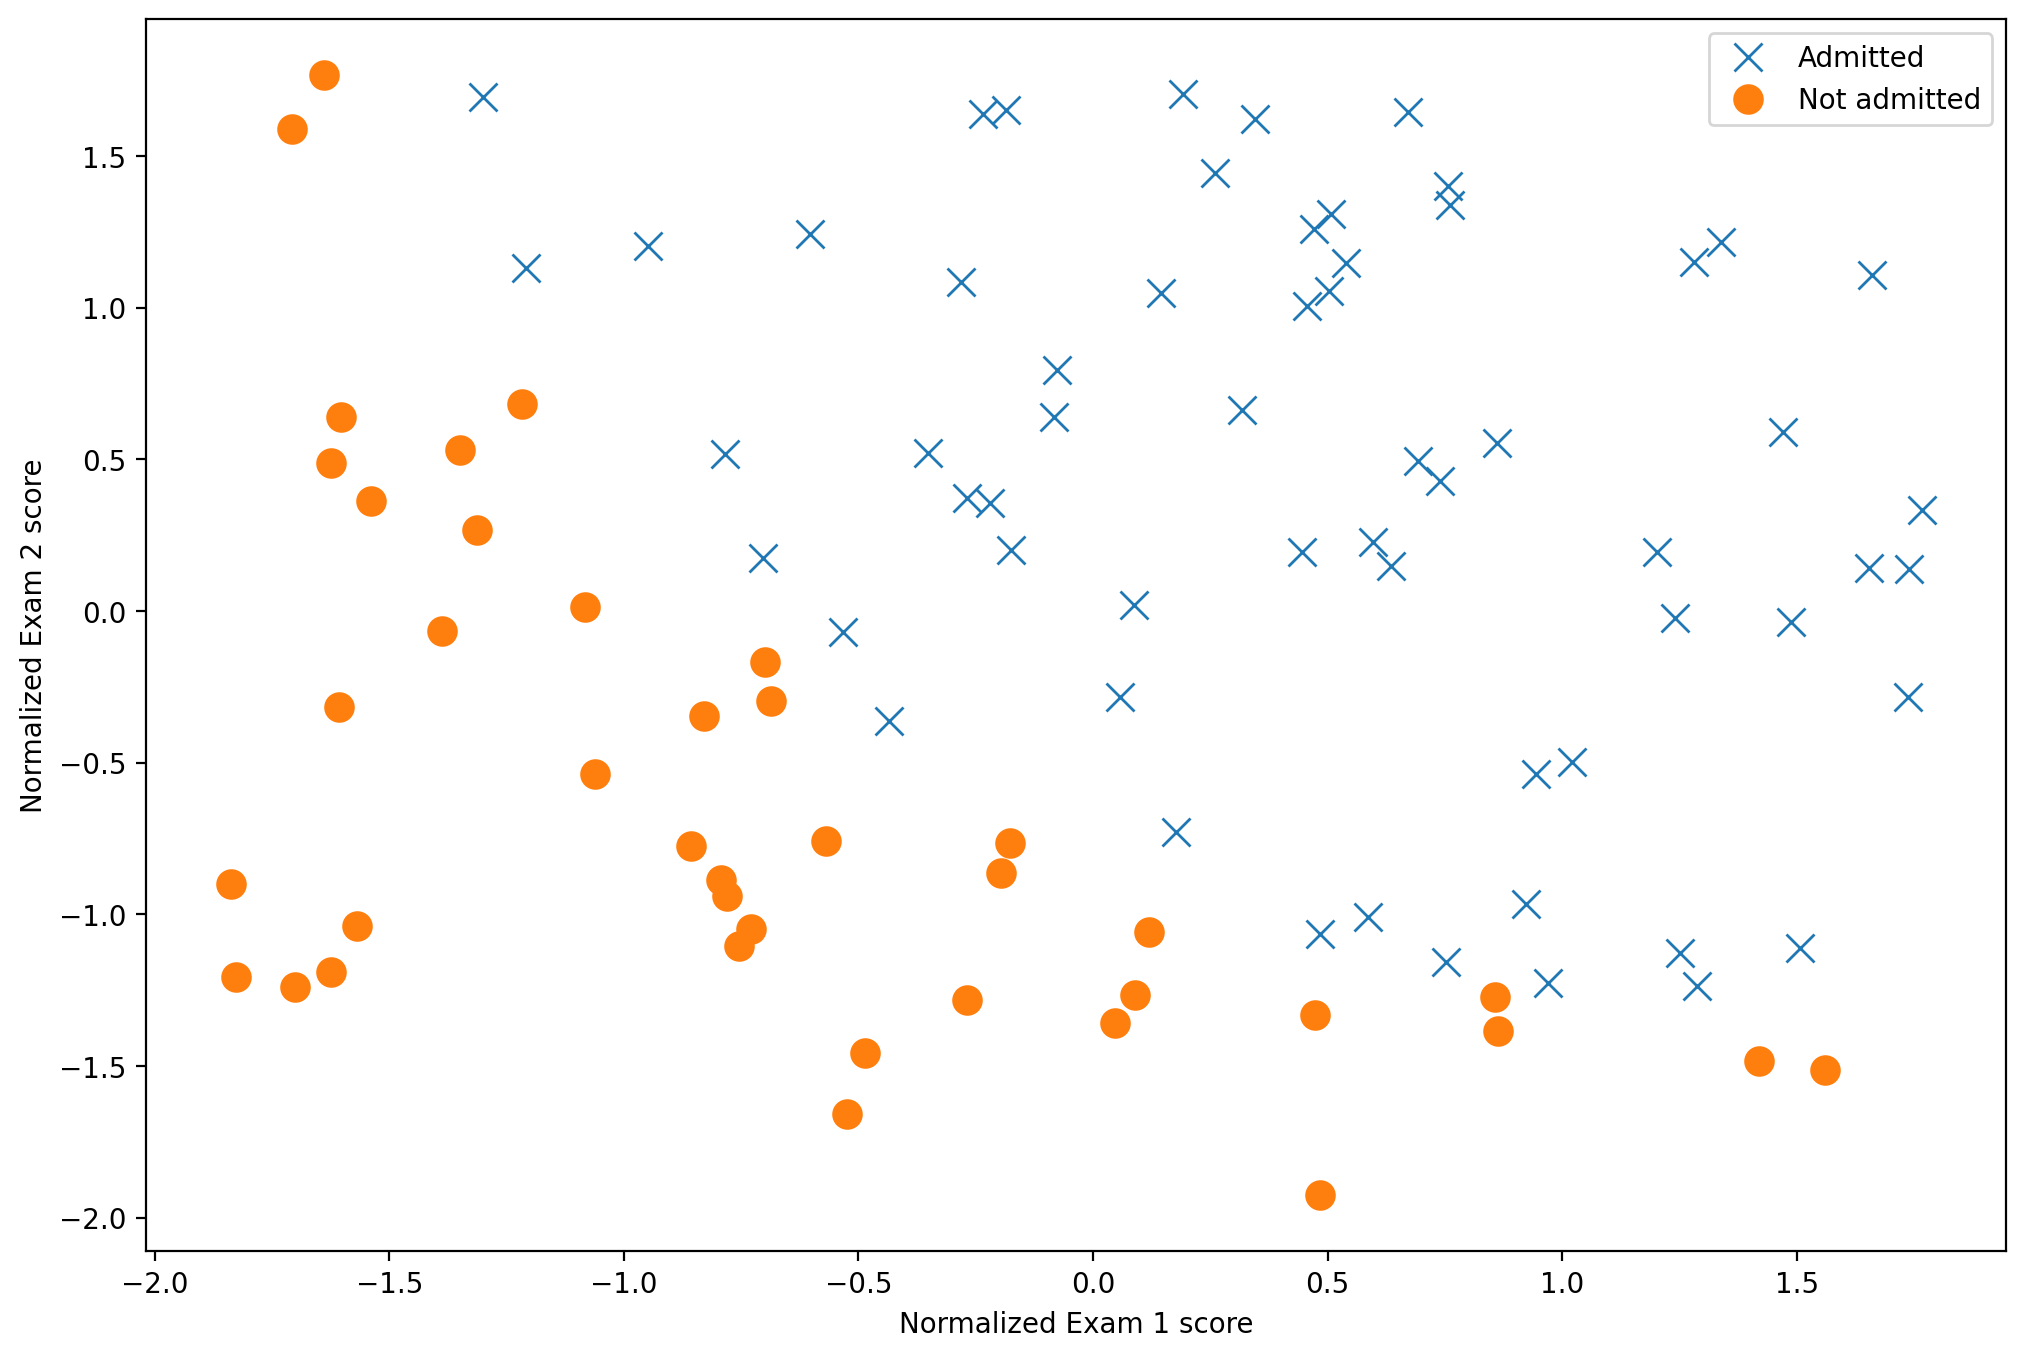

In [4]:
utils.plotData(X, y)

# Logistic Regression

## Loss function

Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:

$$ h_w(x) = \sigma(w \cdot x)$$

where function $\sigma$ is the sigmoid function. The sigmoid function is defined as: 

$$\sigma(z) = \frac{1}{1+e^{-z}} = \frac{e^z}{1+e^{z}} $$

Recall that the parameters of your model are the $w_j$ values. These are
the values you will learn to minimize loss function $L(w)$. 

## Task 1: Compute the Sigmoid function

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
Your first task is to complete the code for the `sigmoid` function
    
```python
    def sigmoid(z)
``` 

Parameters:
- $z$ the value 

**Return**: The sigmoid of $z$.
</div>

For large positive values of `z`, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating `sigmoid(0)` should give you exactly 0.5. 

**Your code should also work with vectors and matrices as input.**

In [5]:
def sigmoid(z):
    """
    Instructions
    ------------
    Compute the sigmoid of each value of z (z can be a matrix, vector or scalar).
    """
    
    # initialize some useful values
    z = np.array(z, dtype=np.float64)
    
    # You need to return the following variable g correctly 
    g = np.zeros(z.shape, dtype=np.float64)

    # YOUR CODE HERE
    g = 1 / (1 + np.exp(-z))
    
    # return the sigmoid of z
    return g

In [6]:
z = 0
g = sigmoid(z)
print('g(', z, ') \n  is %.2f \n  should be approx. 0.5' % g)
assert abs(g - 0.5) <= 0.01

# Arrays
z = np.array([-100, 100, 0])
g = sigmoid(z)
print('g(', z, ') \n  is ', np.round(g, decimals=2),' \n  should be approx. [0 1 0.5]')
assert (abs(g - np.array([0, 1, 0.5])) <= 0.01).all() 

# Matrices
z = np.array([[-100], [100], [0]])
g = sigmoid(z)
print('g(', z.flatten(), ') \n  is ', np.round(g, decimals=2).flatten(),
      ' \n  should be approx. [0 1 0.5]')
assert (abs(g.flatten() - np.array([0, 1, 0.5])) <= 0.01).all() 


g( 0 ) 
  is 0.50 
  should be approx. 0.5
g( [-100  100    0] ) 
  is  [0.  1.  0.5]  
  should be approx. [0 1 0.5]
g( [-100  100    0] ) 
  is  [0.  1.  0.5]  
  should be approx. [0 1 0.5]


## Task 2: Compute the Hypothesis Function

The logistic regression hypothesis $h_w(x)$ is defined as:

$$ h_w(x) = \sigma(x \cdot w)$$

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
Your next task is to complete the code for the logistic regression hypothesis `hypothesis(x, w)` function. 


```python
def hypothesis(x, w):

```

Parameters:
- $x$ the vector of a single student (with an added bias 1 for $x_0$).
- $w$ are the trained weight vectors.

**Return**: The sigmoid of $x \cdot w$.
</div>

For large positive values of $x \cdot w$, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating `sigmoid(0)` should give you exactly 0.5. Your code should also work with vectors and matrices. 

**Note: To implement this function, you should use the formulation $\sigma(x \cdot w)$ as this allows use to use the hypothesis with the design matrix X as input, too. E.g. $\sigma(Xw)$**

In [7]:
def hypothesis(x, w):
    """
    Instructions
    ------------
    Compute the hypothesis of logistic regression    
    """
    
    # You need to return the following variable g correctly 
    g = np.zeros(x.shape, dtype=np.float64)
        
    # YOUR CODE HERE
    g = sigmoid(np.dot(x, w))
    
    # return the sigmoid of z
    return g

In [8]:
# xw > 0
x1 = np.array([-1, 1, 0])
w = np.array([-1, 1, 1])
g = hypothesis(x1, w)
print('h_w(', x1, ') \n  is {:.3f}'.format(g),' \n  should be approx. 0.88')
assert abs(g - 0.88) <= 0.02

# xw < 0
x2 = np.array([1, 0, 0])
w = np.array([-1, 1, 1])
g = hypothesis(x2,w)
print('g(', x2, ') \n  is {:.3f}'.format(g),' \n  should be approx. 0.268')
assert abs(g - 0.269) <= 0.02

# xw == 0
x3 = np.array([1, 1, 0])
w = np.array([-1, 1, 1])
g = hypothesis(x3,w)
print('g(', x3, ') \n  is {:.3f}'.format(g),' \n  should be approx. 0.5')
assert abs(g - 0.5) <= 0.02

# Use a matrix X as input
A = np.array([[1,1], [1,0], [-1,0]])
w = np.array([-1, 1])
try:
    g = hypothesis(A,w)
    assert (g.shape == (3,))
    print('g(', A.flatten(), ') \n  is ',np.round(g, decimals=2), ' \n  should be approx. [0.5  0.27 0.73]    ')
    assert (abs(g - np.array([0.5, 0.27, 0.73]  )) <= 0.01).all() 
except ValueError:
    print ("Note: To implement this function, you should use the formulation 𝜎(𝑥⋅𝑤)" 
           +" as this allows use to use the hypothesis with the design matrix X as input, to.")
    assert False
    


h_w( [-1  1  0] ) 
  is 0.881  
  should be approx. 0.88
g( [1 0 0] ) 
  is 0.269  
  should be approx. 0.268
g( [1 1 0] ) 
  is 0.500  
  should be approx. 0.5
g( [ 1  1  1  0 -1  0] ) 
  is  [0.5  0.27 0.73]  
  should be approx. [0.5  0.27 0.73]    


<hr>

## Design Matrix 
We store each example as a row in the the design matrix $X$. To take into account the intercept term ($w_0$), we add an additional first column to $X$ and set it to $1$. This allows us to treat $w_0$ as simply another 'feature' $x_0$.

In [9]:
# Add intercept term to X to get design matrix
m, n = X.shape
X_train = np.concatenate([np.ones((m, 1)), X], axis=1)

## Task 3: Cost Function and the Gradient

Now, complete the code for the function `costFunction` to return the cost and gradient. Recall that the cost function in logistic regression is

$$ L(w) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log\left(h_w\left( x^{(i)} \right) \right) + \left( 1 - y^{(i)}\right) \log \left( 1 - h_w\left( x^{(i)} \right) \right) \right]$$

and the gradient of the cost is a vector of the same length as $w$ where the $j^{th}$
element (for $j = 0, 1, \dots , n$) is defined as follows:

$$ \frac{dL(w)}{dw_j} = \frac{1}{m} \sum_{i=1}^m \left( h_w \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
Implement the cost function of logistic regression:

```python
def costFunction(w, X, y):

```

Parameters:
- $w$ is the weight vector.
- $X$ is the design matrix whose rows represent the examples from the training set.
- $y$ is a vector whose each elements represent the value at a given row of $X$.

**Return**: Tuple (L, grad): the total loss 'L', and the gradient 'grad' for each sample x in X

</div>



**Note 1: It is much faster and easier to implement these as Matrix-Vector and Vector-Vector operations. If you like, you can try to work this out for yourself. Otherwise for a vectorized formulation refer to lecture 06 for the gradient and the loss function (excluding the regularizer term at the end).**

*Note 2: that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of the hypothesis $h_w(x)$.*



In [10]:
# epsilon to avoid log(0)
eps = 1e-7

def costFunction(w, X, y):
    """
    Compute the cost of a particular choice of w. You should set L to 
    the cost. Compute the partial derivatives and set grad to the partial
    derivatives of the cost w.r.t. each parameter in w.   
    
    It is much faster and easier to implement these as Matrix-Vector and 
    Vector-Vector operations. If you like, you can try to work this out for yourself. 
    Otherwise for a vectorized formulation refer to lecture 06 for the 
    gradient and the loss function (excluding the regularizer term at the end).
    """
    # Initialize some useful values
    # m: number of training examples
    m = y.size  

    # You need to return the following variables correctly 
    L = 0
    grad = np.zeros(w.shape, dtype=np.float64)

    # we add a small epsilon to our hypothesis to avoid log(0), which is undefined
    h_w = hypothesis(X, w)
    h_w[h_w==1] = 1 - eps
    h_w[h_w==0] = eps
    
    # YOUR CODE HERE
    # Compute the logistic regression loss
    L = -1/m * np.sum(y * np.log(h_w) + (1 - y) * np.log(1 - h_w))

    # Compute the gradient
    grad = 1/m * np.dot((h_w - y), X)
    
    return L, grad

In [11]:
# Initialize w vector
test_w = np.zeros(n+1)
cost, grad = costFunction(test_w, X_train, y)
print('Cost at initial w (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')
assert abs(cost - 0.693) <= 0.02

print('Gradient at initial w (zeros):')
print('\t[{:.2f}, {:.2f}, {:.2f}]'.format(*grad))
print('Expected gradients (approx):\n\t[-0.10, -0.28, -0.251]\n')
assert (abs(grad - np.array([-0.1, -0.28, -0.251])) <= 0.02).all() 

# Compute and display cost and gradient with non-zero w
test_w = np.array([-2, 0.2, 0.2])
cost, grad = costFunction(test_w, X_train, y)

print('Cost at test w: {:.3f}'.format(cost))
print('Expected cost (approx): 1.22\n')
assert abs(cost - 1.22) <= 0.02

print('Gradient at test w:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Expected gradients (approx):\n\t[-0.478, -0.261, -0.230]')
assert (abs(grad - np.array([-0.478, -0.261, -0.230])) <= 0.02).all() 


Cost at initial w (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial w (zeros):
	[-0.10, -0.28, -0.25]
Expected gradients (approx):
	[-0.10, -0.28, -0.251]

Cost at test w: 1.225
Expected cost (approx): 1.22

Gradient at test w:
	[-0.478, -0.261, -0.230]
Expected gradients (approx):
	[-0.478, -0.261, -0.230]


## Task 4: Gradient descent

Next, you will complete a function which implements gradient descent.
The loop structure has been written for you, and you only need to supply the updates to $w$ within each iteration. 

Gradient descent is given by:

```

randomly initialize w
repeat until convergence:
    
```
$$w = w - \alpha \cdot \nabla L(w)$$

<div class="alert alert-success alertsuccess" style="margin-top: 20px">

Implement the gradient descent method:

```python
def gradientDescent(X, y, w, alpha, num_iters):

```

Parameters:
- $X$ is the design matrix whose rows represent the examples from the training set.
- $y$ is a vector whose each elements represent the value at a given row of $X$.
- $w$ is initial guess for the weight vector.
- $\alpha$ is the learning rate used in gradient descent.
- $num\_iters$ is the number of iterations after which to stop, i.e. the convergence criteria.

**Return**: $w$: the trained weight vector.

</div>

Make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $L(w)$ is parameterized by the vector $w$, not $X$ and $y$. That is, we minimize the value of $L(w)$ by changing the values of the vector $w$. A good way to verify that gradient descent is working correctly is to look at the value of $L(w)$ and check that it is decreasing with each step. 

The gradient $\nabla L(w)$ and the cost $L(w)$ were computed by you in the previous exercise. Your function `gradientDescent` has to call `costFunction` on every iteration. It saves this cost to the `L_history` list. Assuming you have implemented gradient descent and `costFunction` correctly, your value of $L(w)$ should converge to a steady value by the end of the algorithm.
<a id="gradientDescent"></a>

In [12]:
def gradientDescent(X, y, w, alpha, num_iters):
    """
    Performs gradient descent to learn `w`. Updates w by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Write code to perform a single gradient descent step.
    
    While debugging, it can be useful to print out the values or shapes of 
    the cost function (computeCost) and gradient here.    
    """
    # Initialize some useful values
    # number of training examples
    m = y.shape[0]  
    
    # make a copy of w, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    w = w.copy()
    
    # Use a python list to save cost in every iteration
    L_history = [] 
    
    for i in range(num_iters):        
        
        # YOUR CODE HERE
        cost = costFunction(w, X, y)
        w = w - alpha*cost[1]
        L = cost[0]

        # save the cost L in every iteration
        L_history.append(L)
    
    return w, L_history

In [13]:
# initialize fitting parameters
w = np.array([-2, 2, 2])

# some gradient descent settings
iterations = 1000
alpha = 5

w, L_history = gradientDescent(X_train, y, w, alpha, iterations)

print('w found by gradient descent: {:.2f}, {:.2f}, {:.2f}'.format(*w))
print('Expected w values (approximately): [1.72, 3.99, 3.73]')
assert (abs(w - np.array([1.72, 3.99, 3.73])) <= 0.02).all() 

# Print w to screen
print('Cost L at w found: {:.2f}'.format(L_history[-1]))
print('Expected cost L at w (approximately): 0.20\n');
assert abs(L_history[-1] - 0.21) <= 0.02



w found by gradient descent: 1.72, 3.99, 3.73
Expected w values (approximately): [1.72, 3.99, 3.73]
Cost L at w found: 0.20
Expected cost L at w (approximately): 0.20



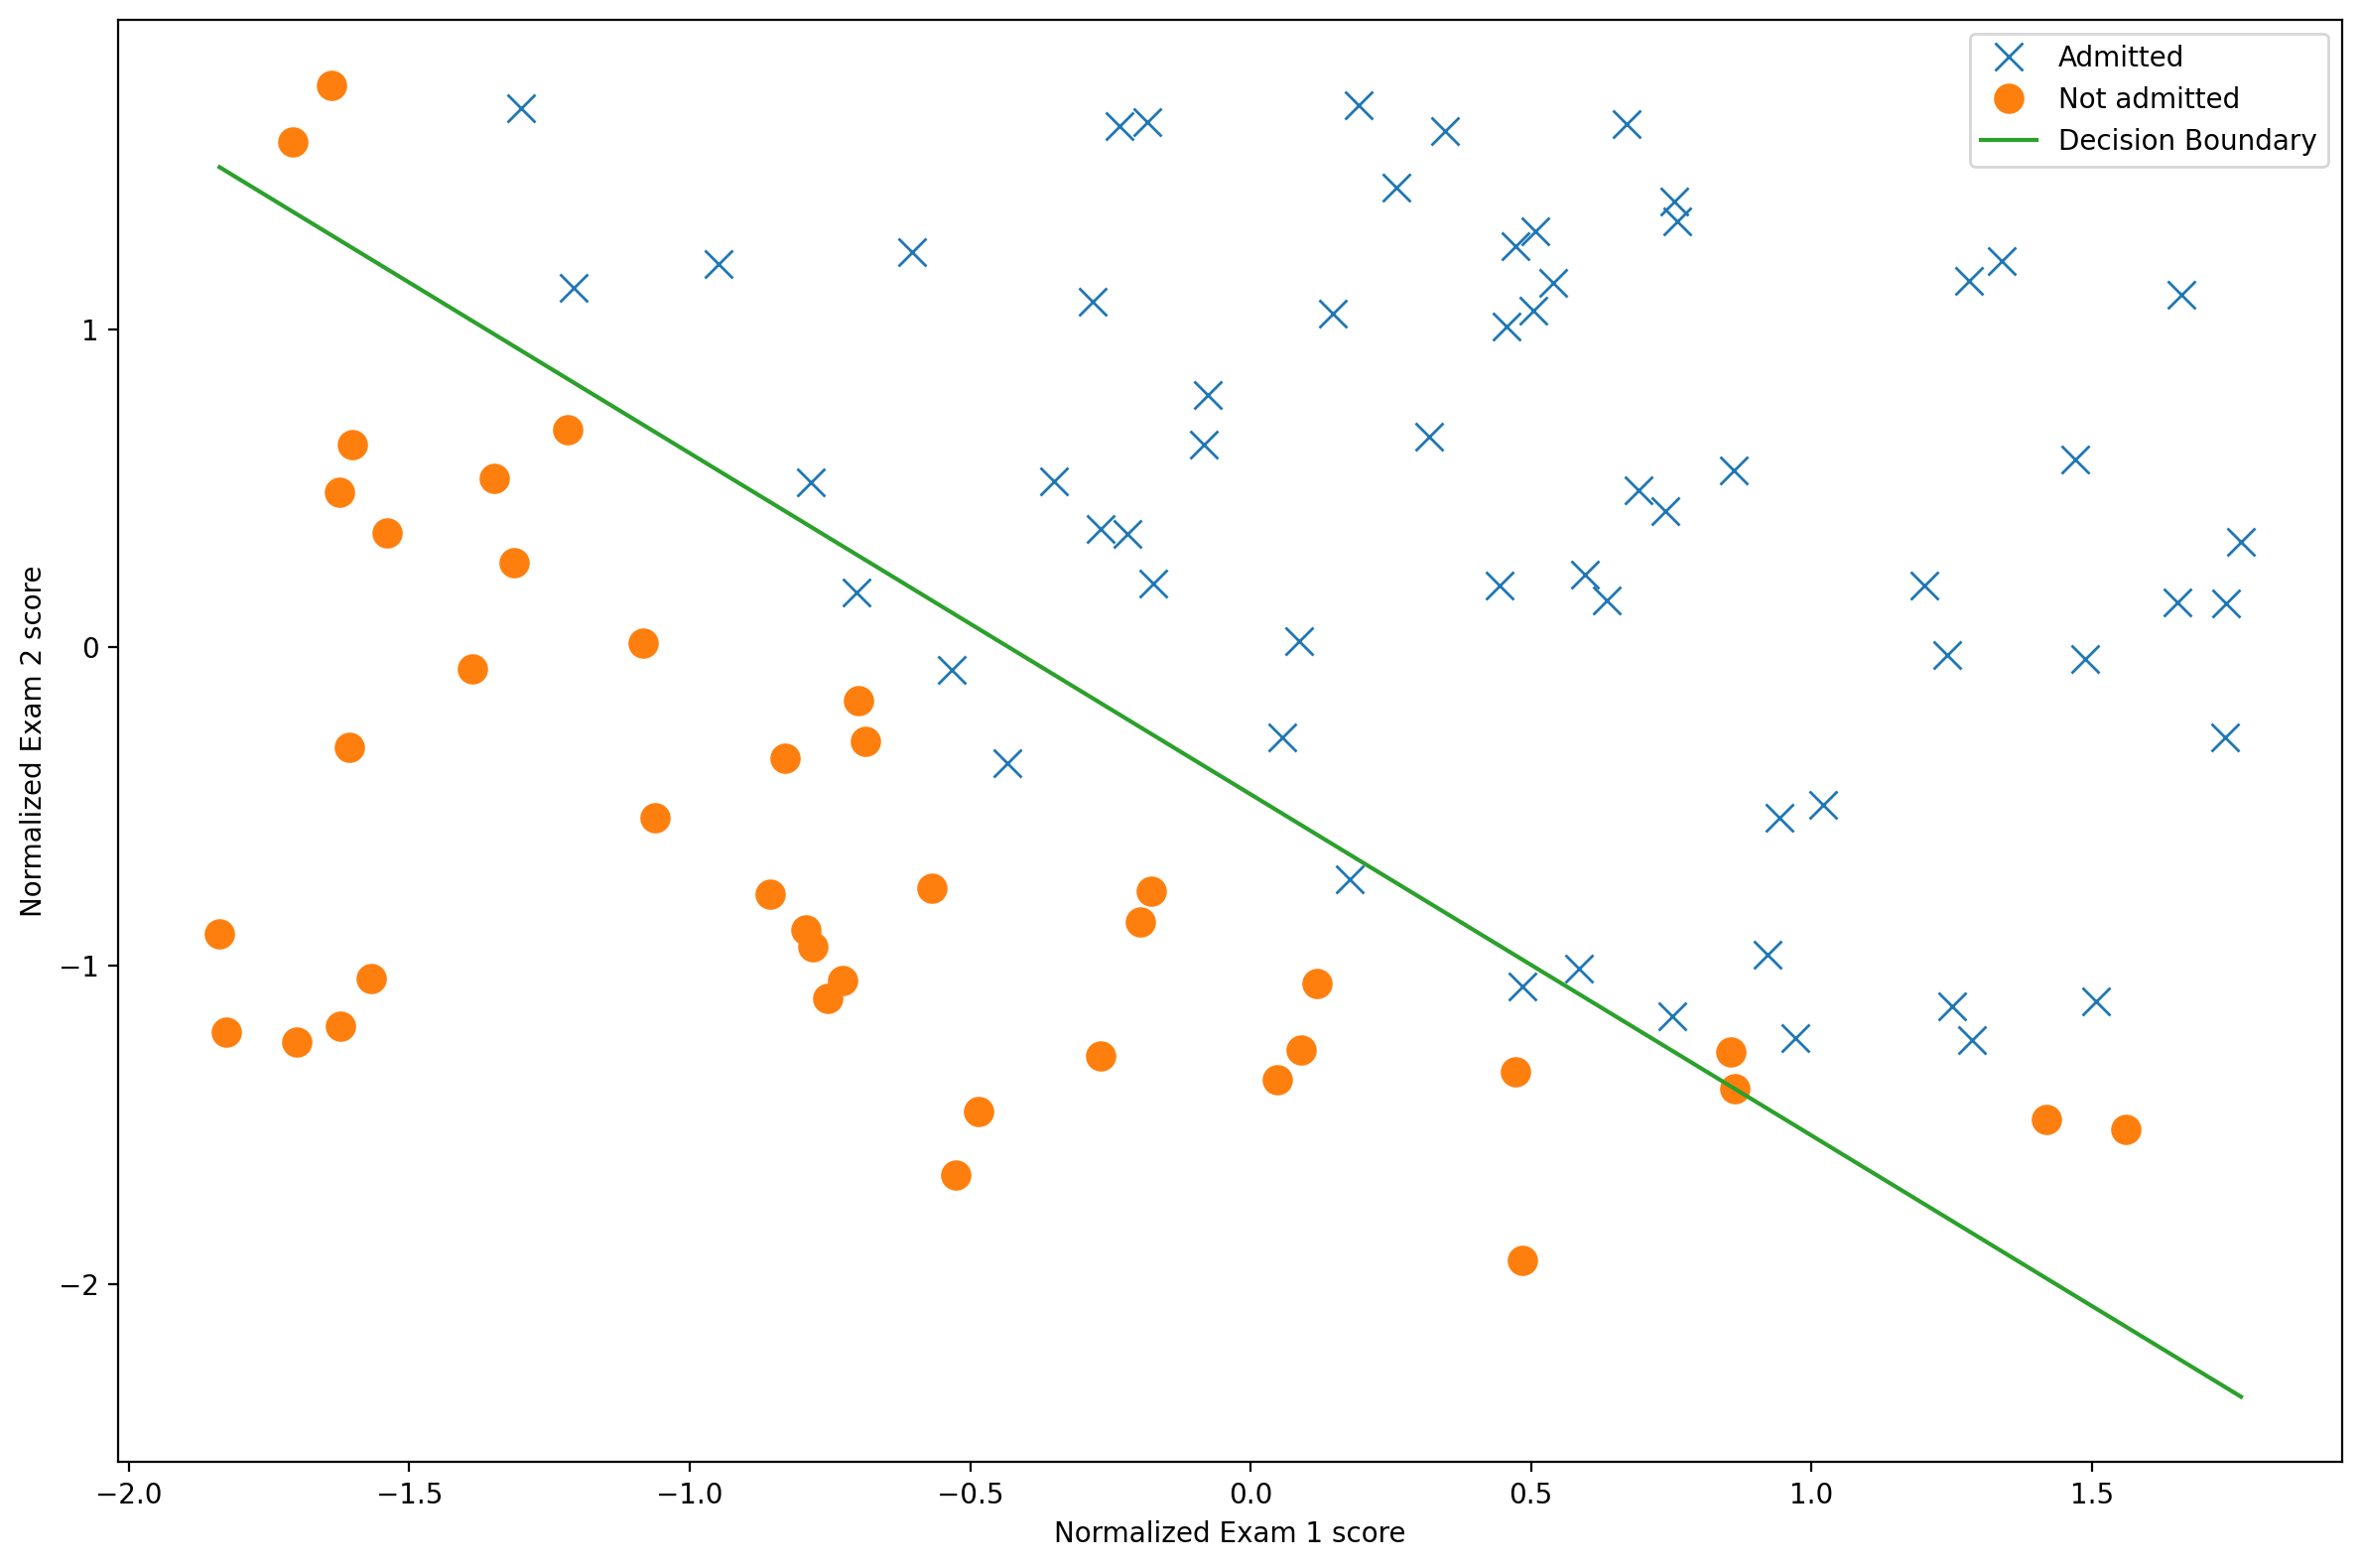

In [14]:
# Plot Boundary
utils.plotDecisionBoundary(utils.plotData, w, X_train, y)

<hr>

## Learning Curve

We now monitor the train loss over iterations. If gradient descent is working correctly and set a sufficiently small learning rate $\alpha$, we should see a decrease in the loss $L(w)$ over every iteration (epoch).

You can change alpha in the dropdown to see different learning curves.

In [15]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

@interact
def plotLearningRate(alpha=[0.0001,0.001,0.01,0.1,1,10,20,50,100,200,300,400]):
    w = np.array([-10, 1, 1])    
    iterations = 5000
    
    w, L_history = gradientDescent(X_train, y, w, alpha, iterations)
    fig, ax = plt.subplots(figsize=(16,6))
    ax.set_ylabel('L(w)')
    ax.set_xlabel('Iterations')
    plt.title('Alpha:' + str(alpha))
    _=ax.plot(range(len(L_history)), L_history, 'b')

interactive(children=(Dropdown(description='alpha', options=(0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 50, 100, 200…

## Task 5: Sensitivity to the Learning Rate
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
Which alpha(s) correspond to a
    
- too low learning rate
- good learning rate
- too high learning rate?
    
**Explain this briefly.**
</div>

In [16]:
# YOUR CODE HERE
'''too low:  0.0001
          0.001
good:     0.01
too high: >=0.1'''

'too low:  0.0001\n          0.001\ngood:     0.01\ntoo high: >=0.1'

<hr>

# SciPy: Optimization

In the previous tasks, you found the optimal parameters of a logistic regression model by implementing gradient descent. You wrote a cost function and calculated its gradient, then took a gradient descent step accordingly. This time, instead of taking gradient descent steps, you will use the [`scipy.optimize` module](https://docs.scipy.org/doc/scipy/reference/optimize.html). 

You are going to use `optimize.minimize` to find the best parameters $w$ for the logistic regression cost function, given a fixed dataset (of X and y values). The code passes to `optimize.minimize` the following inputs:
- `costFunction`: A cost function that, when given the training set and a particular $w$, computes the logistic regression cost and gradient with respect to $w$ for the dataset (X, y). We only pass the name of the function without the parenthesis.
- `initial_w`: The initial values of the parameters we are trying to optimize.
- `(X, y)`: These are additional arguments to the cost function.
- `jac`: Indication if the cost function should returns the gradient (Jacobian) along with cost value.
- `method`: Optimization method/algorithm to use
- `options`: Additional options which might be specific to the specific optimization method. In the following, we only tell the algorithm the maximum number of iterations before it terminates.

If you have completed the `costFunction` correctly, `optimize.minimize` will converge on the right optimization parameters and return the final values of the cost and $w$ in a class object. Notice that by using `optimize.minimize`, you did not have to write any loops yourself, or set a learning rate like you did for gradient descent. This is all done by `optimize.minimize`: one only neededs to provide a function calculating the cost and the gradient.

In [17]:
# The first two columns contains the exam scores and the third column
# contains the label.
X, y, scaler = utils.load_exam_data()

# Design Matrix
m, n = X.shape
X_train = np.concatenate([np.ones((m, 1)), X], axis=1)

In [18]:
# set options for optimize.minimize
options = {'maxiter': 400}
initial_w = np.zeros(X_train.shape[1])

res = optimize.minimize(costFunction,
                        initial_w,
                        (X_train, y),
                        jac=True, # use gradient
                        method='TNC', 
                        options=options)

# the value of costFunction at optimized w
cost = res.fun

# the optimized w
w = res.x

# Print w to screen
print('Cost at w found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');
assert abs(cost - 0.203) <= 0.01

print('w:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*w))
print('Expected w (approx):\n\t[1.718, 3.992, 3.724]')
assert (abs(w - np.array([1.718, 3.992, 3.724])) <= 0.05).all() 

Cost at w found by optimize.minimize: 0.203
Expected cost (approx): 0.203

w:
	[1.718, 3.992, 3.724]
Expected w (approx):
	[1.718, 3.992, 3.724]


C:\Users\fagda\AppData\Local\Temp\ipykernel_12144\3257780658.py:5: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  res = optimize.minimize(costFunction,


### Plot decision boundary

Once `optimize.minimize` completes, we want to use the final value for $w$ to visualize the decision boundary on the training data as shown in the figure below. 

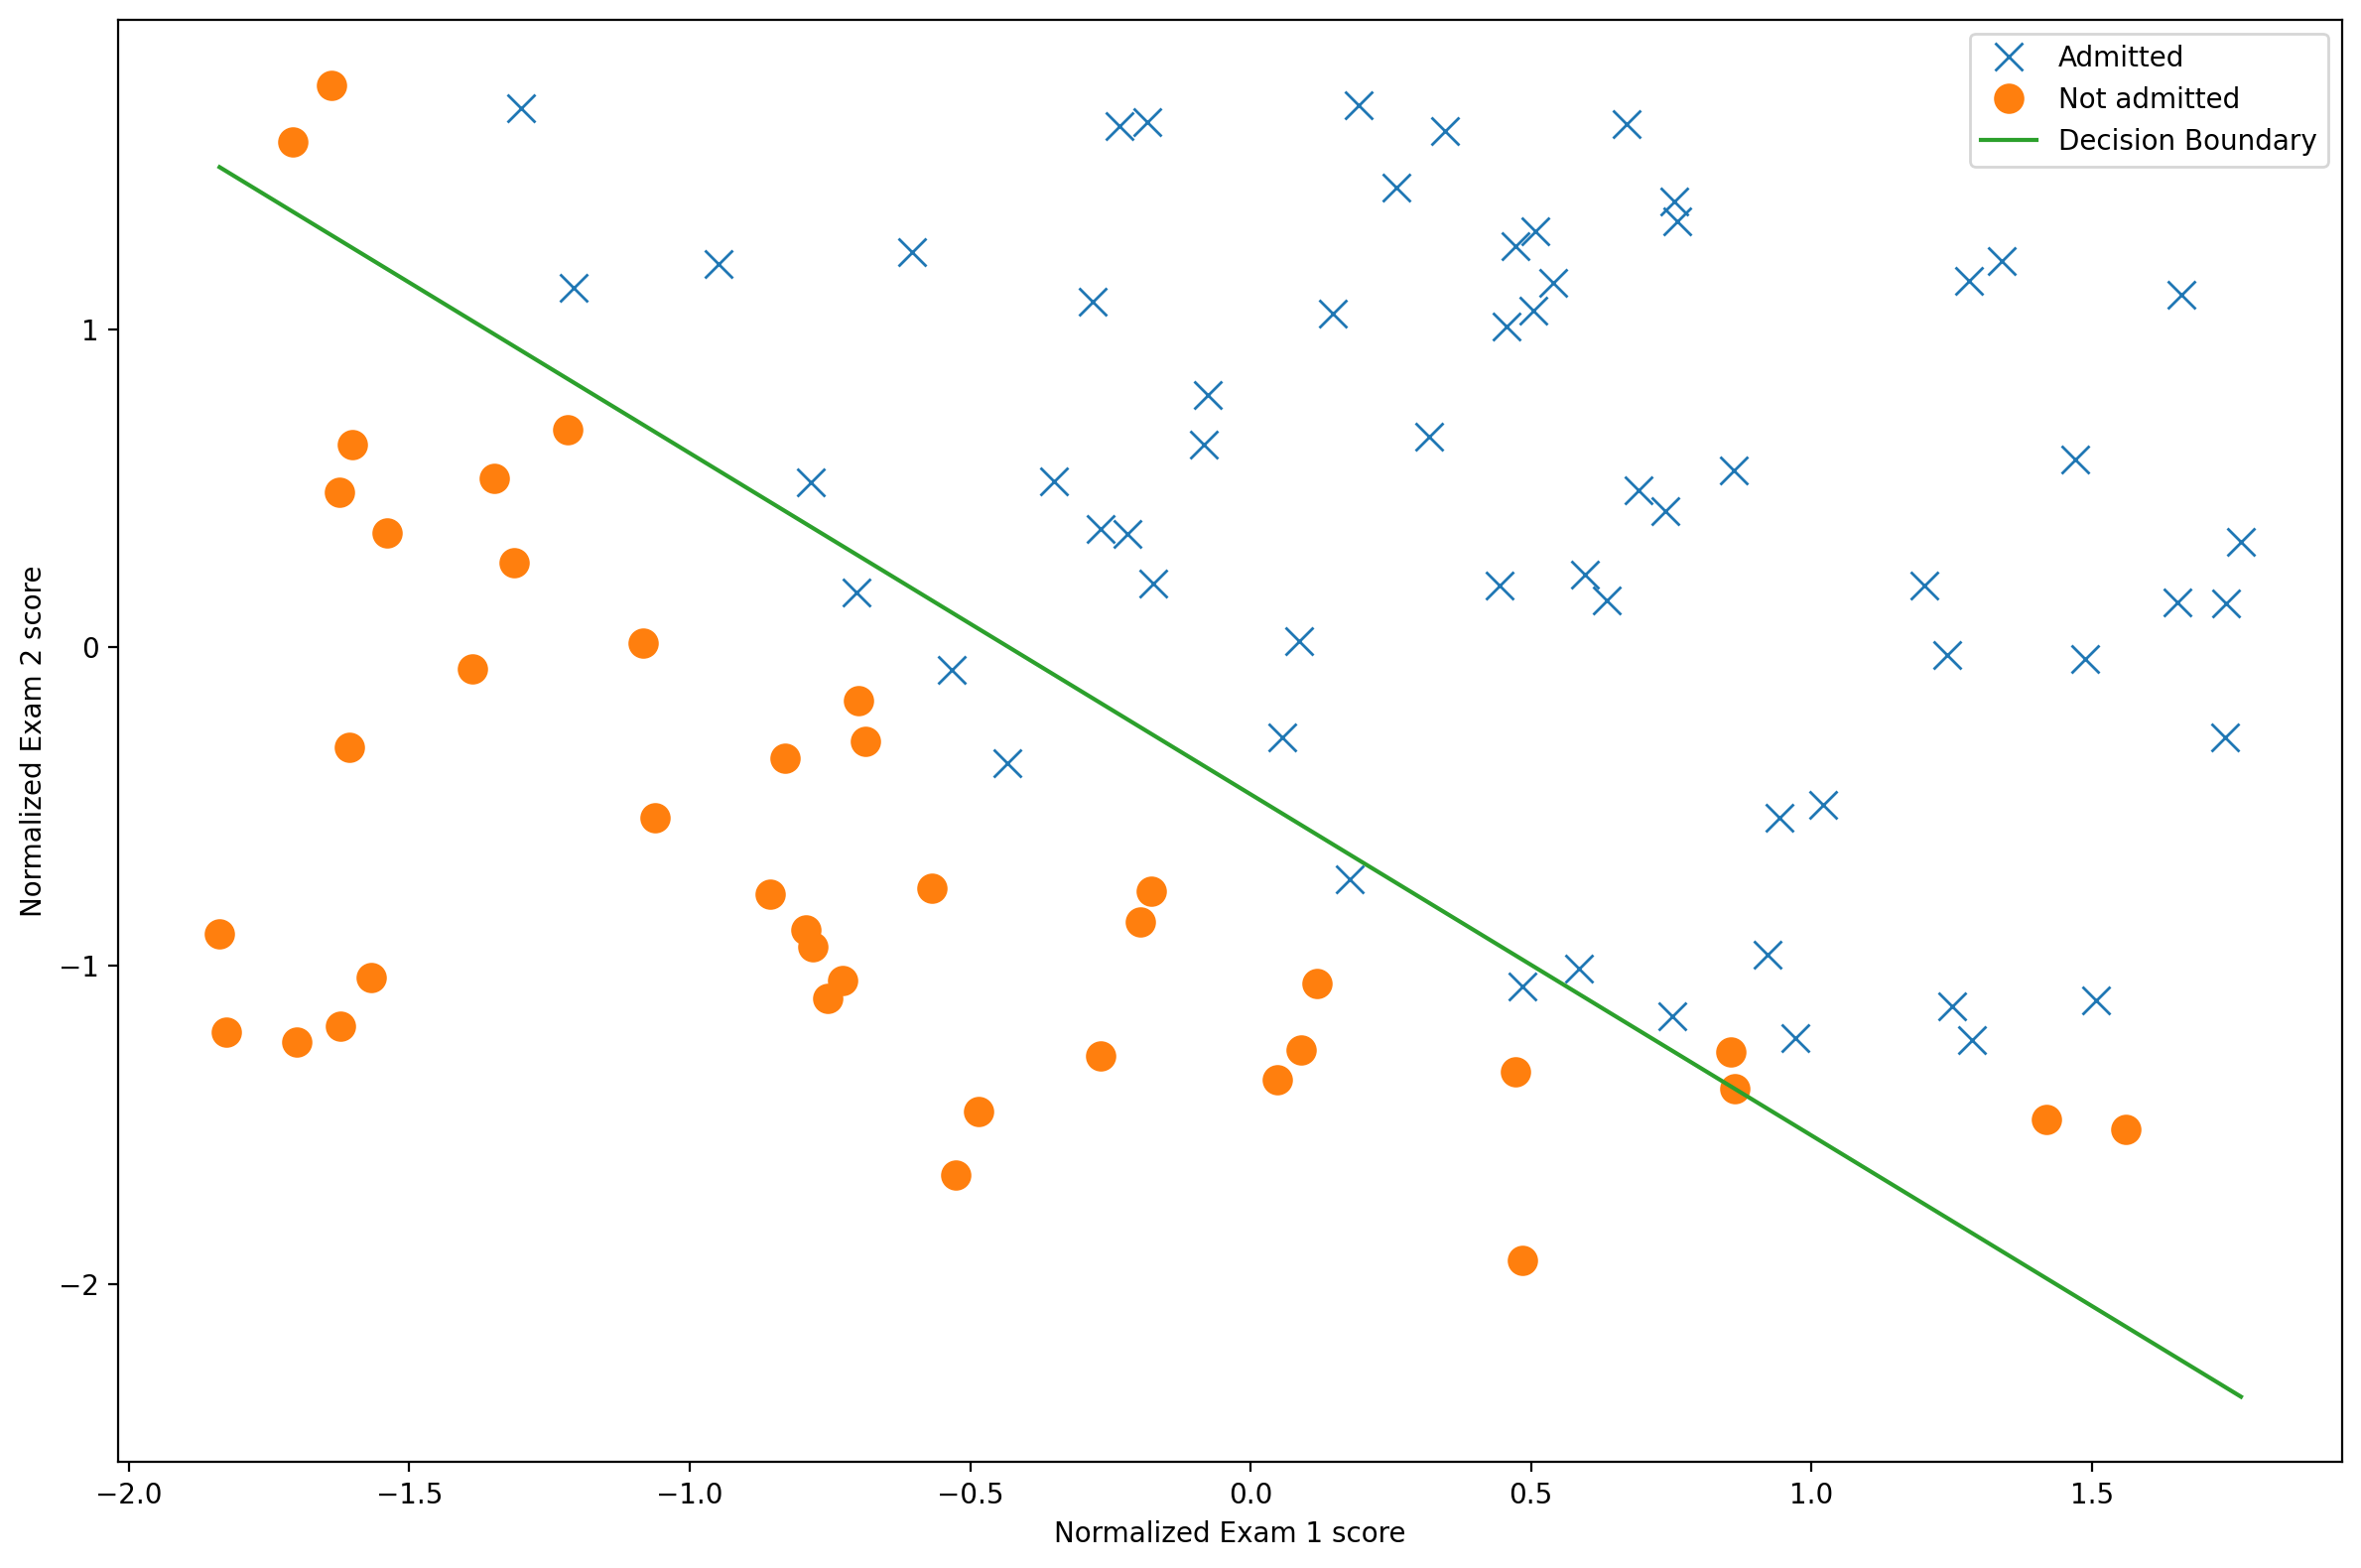

In [19]:
# Plot Boundary
utils.plotDecisionBoundary(utils.plotData, w, X_train, y)

<hr>

## Task 6: Evaluating Logistic Regression

After learning the parameters w, you can use the model to predict whether a particular student will be admitted. In this part, your task is to complete the code in function `predict`. 

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
Implement the following method

```python
def predict(X, w):
```
that predicts the outcome $1$ or $0$ of each <b>training sample</b> in `X` given the weight vector w and hypothesis $h_w(x)$.

Parameters:
- X_train: the train data (without bias $x_0$ column)
- w: the trained weight vectors.

**Return**: A tuple: (predictions, confidence)
</div>

The predict function will produce “1” or “0” predictions given a dataset and a learned parameter vector $w$. 
The confidence $h_w(x)$ is equal to the probability of admission (e.g. $y=1$).


In [20]:
def predict(X, w):
    """
    Predict whether the label is 0 or 1 using learned logistic regression.

    Compute the predictions for X using a threshold at 0.5 
    (i.e., if  h_w(x) >= 0.5, predict 1). In the end, vector p should 
    contain 0's and 1's.
    
    Compute the confidence using the hypothesis h_w(x).
    """
    m = X.shape[0] # Number of training examples

    # You need to return the following variables correctly
    predictions = np.zeros(m) # y = {1,0}
    confidence = np.zeros(m)  # p(y=1 | x)

    # YOUR CODE HERE
    h_w = hypothesis(X, w)
    predictions = (h_w >= 0.5).astype(int)
    confidence = h_w
        
    return predictions, confidence

In [21]:
w = [1.718, 3.992, 3.724]

# normalize input first
score_1, score_2 = scaler.transform([[45, 85]])[0]

p, conf = predict(np.array([[1, score_1, score_2]]), w)
p, conf = predict(np.array([[1, score_1, score_2], [1, 2, 3]]), w)

#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 
p, conf = predict(np.array([[1, score_1, score_2]]), w)

print('For a student with scores 45 and 85:'
      '\n We predict an admission probability of {:.3f}'.format(conf[0]))
print(' Expected value (approx): 0.776\n')
assert p[0]==True
assert abs(*conf - 0.776) <= 0.02

# normalize input first
score_1, score_2 = scaler.transform([[50, 55]])[0]

# Negative example
p, conf = predict(np.array([[1, score_1, score_2]]), w)
print('For a student with scores 15 and 45:'
      '\n We predict an admission probability of {:.3f}'.format(conf[0]))
print(' Expected value (approx): 0.023\n')
assert p[0]==False
assert abs(conf[0] - 0.022) <= 0.02

# Compute accuracy on our training set
p, conf = predict(X_train, w)
accuracy = np.mean(p == y)
print('Overall Train Accuracy: {:.1f} %'.format(accuracy * 100))
print('Expected accuracy (approx): 89.0 %')
assert abs(accuracy - 0.90) <= 0.02


For a student with scores 45 and 85:
 We predict an admission probability of 0.776
 Expected value (approx): 0.776

For a student with scores 15 and 45:
 We predict an admission probability of 0.023
 Expected value (approx): 0.023

Overall Train Accuracy: 89.0 %
Expected accuracy (approx): 89.0 %


<hr>

# Microchip Fabrication - Regularized Logistic Regression

In this part of the exercise, you will use regularized logistic regression to predict whether microchips from a fabrication plant pass quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.
Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

First, we load the data from a CSV file:

In [22]:
# no design matrix needed in SciKit-Learn
X, y, scaler = utils.load_microchip_data()

## Visualize the data

Similar to the previous parts of this exercise, `plotData` is used to generate a figure, where the axes are the two test scores, and the positive (y = 1, accepted) and negative (y = 0, rejected) examples are shown with
different markers.

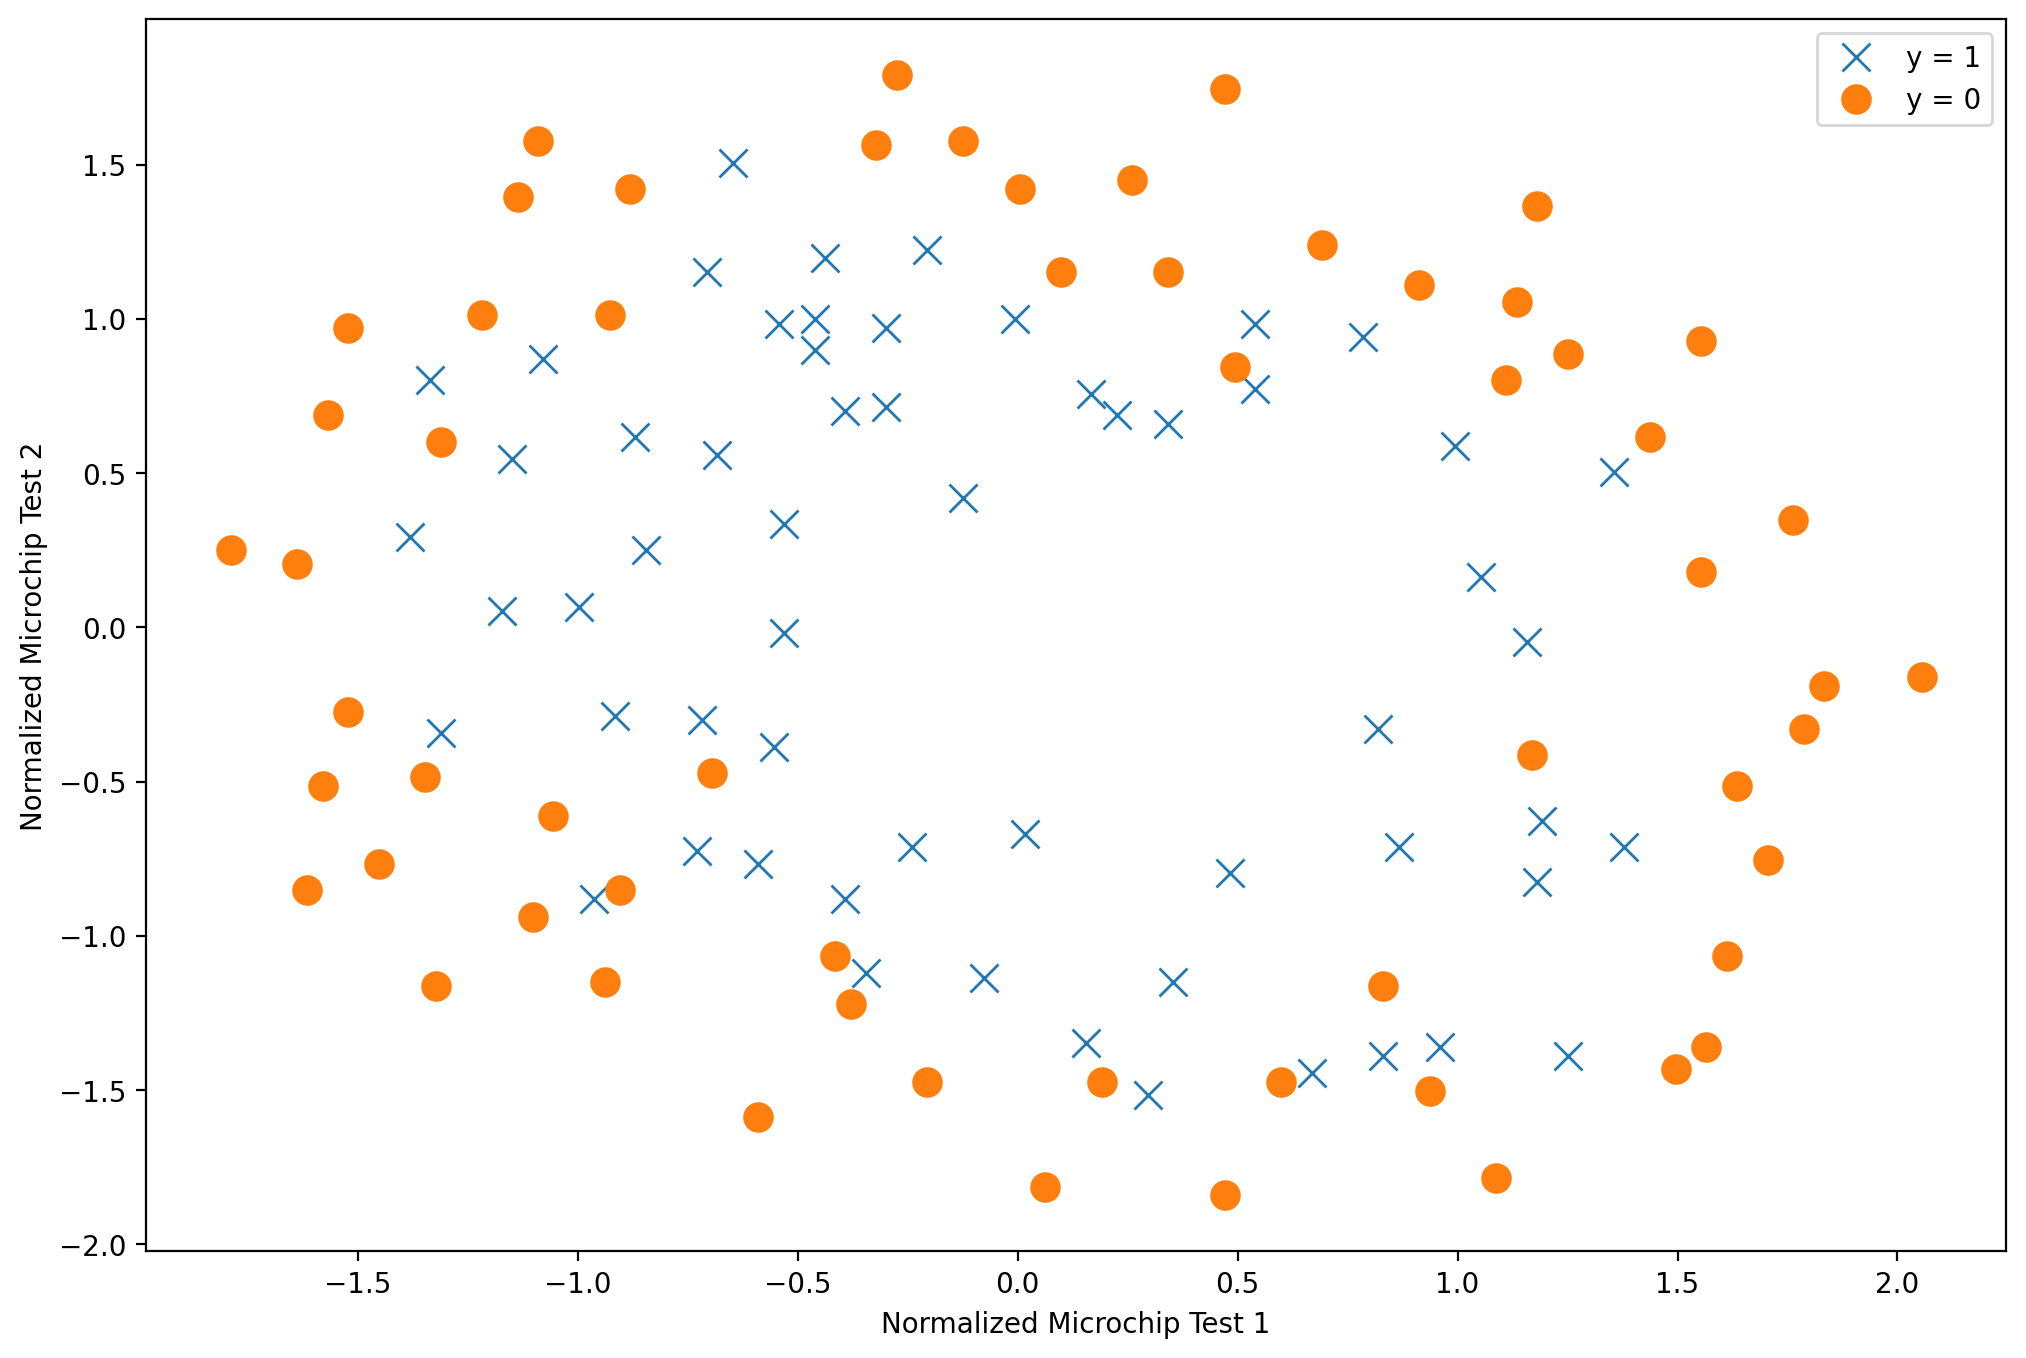

In [23]:
utils.plotData(X, y)

# Labels and Legend
plt.xlabel('Normalized Microchip Test 1')
plt.ylabel('Normalized Microchip Test 2')

# Specified in plot order
_ = plt.legend(['y = 1', 'y = 0'], loc='best')

The above figure shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight-forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

## Feature mapping

To add polynomial features we use <code>sklearn.preprocessing.PolynomialFeatures</code> and apply it to our datasets. This results in polynomial features of <code>degree=6</code>.

In [24]:
from sklearn.preprocessing import PolynomialFeatures
degree = 6
poly = PolynomialFeatures(degree=degree, include_bias=True)
X_poly = poly.fit_transform(X)

## Task 7: Cost Function and Gradient

Now you will implement code to compute the cost function and gradient for regularized logistic regression. 

Recall that the regularized cost function in logistic regression is

$$ L(w) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)}\log \left( h_w \left(x^{(i)} \right) \right) - \left( 1 - y^{(i)} \right) \log \left( 1 - h_w \left( x^{(i)} \right) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n w_j^2 $$

The gradient of the cost function is a vector where the $j^{th}$ element is defined as follows:

$$ \frac{dL(w)}{dw_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_w \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m}w_j$$

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
Complete the code for the function `costFunctionReg` below to return the cost and gradient:

```python
def costFunctionReg(w, X, y, lambda_):

```

Parameters:
- $w$ is the weight vector.
- $X$ is the design matrix whose rows represent the examples from the training set.
- $y$ is a vector whose each elements represent the value at a given row of $X$.
- lambda_: is the regularization parameter.


**Return**: Tuple (L, grad): the total loss 'L', and the gradient 'grad' for each sample x in X

</div>

**Note 1: You should not regularize the parameters $w_0$.**

**Note 2: You should make use of `costFunction()` implemented earlier.**

**Note 3: It is much faster and easier to implement these as Matrix-Vector and Vector-Vector operations. If you like, you can try to work this out for yourself. Otherwise for a vectorized formulation refer to lecture 06 for the loss function.**





In [25]:
def costFunctionReg(w, X, y, lambda_):
    """
    Compute the cost `L` of a particular choice of w.
    Compute the partial derivatives and set `grad` to the partial
    derivatives of the cost w.r.t. each parameter in w.
    
    Note that you should not regularize the parameters w[0]!
    The easiest solution to this, is to set w[0]=0 prior to 
    adding the regularization term to L and grad.   
    
    You should make use of 'costFunction()' for unregularized logistic 
    regression implemented earlier
    """
    # Initialize some useful values
    m = y.size  # number of training examples

    # make a copy of w, to avoid changing the original array
    w = w.copy()
        
    # You need to return the following variables correctly 
    L = 0
    grad = np.zeros(w.shape)

    # YOUR CODE HERE
    L0, grad0 = costFunction(w, X, y)
    w[0] = 0
    grad = grad0 + (lambda_/m)*w
    L = L0 + (lambda_/(2*m))*np.sum(np.square(w[1:]))
    
    return L, grad

In [26]:
# Initialize fitting parameters
initial_w = np.zeros(X_poly.shape[1])

# Compute and display cost and gradient
# with all-ones w and lambda = 1
lambda_ = 1
cost, grad = costFunctionReg(initial_w, X_poly, y, lambda_)

print('Cost at test w           : {:.2f}'.format(cost))
print('Expected cost (approx)   : 0.69\n')
assert (abs(cost-0.69) <= 0.01).all() 

print('Gradient at initial w (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.0085, 0.0371, -0.0028, 0.1975, 0.0318]\n')
assert (abs(grad[0:5] - np.array([0.0085, 0.0371, -0.0028, 0.1975, 0.0318])) <= 0.01).all() 

# Compute and display cost and gradient
# with all-ones w and lambda = 10
lambda_ = 10
test_w = np.ones(X_poly.shape[1])
cost, grad = costFunctionReg(test_w, X_poly, y, lambda_)

# check for w0
if abs(cost-3.21) < 0.01 :
    print ('Did you forget to exclude the w[0] from the regularization term?')
    assert (abs(cost-3.16) <= 0.01)
    
print('------------------------------\n')
print('Cost at test w        : {:.2f}'.format(cost))
print('Expected cost (approx): 8.54\n')
assert (abs(cost-8.54) <= 0.05).all() 

print('Gradient at initial w (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.4487, 0.1522, 0.1014, 0.7547, 0.0441]')
assert (abs(grad[0:5] - np.array([0.4487, 0.1522, 0.1014, 0.7547, 0.0441])) <= 0.01).all() 


# Compute and display cost and gradient
# with all-ones w and lambda = 0
# should be the same as normal logistic regression
lambda_ = 0
test_w = np.ones(X_poly.shape[1])
cost, grad = costFunctionReg(test_w, X_poly, y, lambda_)
cost2, grad2 = costFunction(test_w, X_poly, y)

print('------------------------------\n')
print('Cost at test w        : {:.2f}'.format(cost))
print('Expected cost (approx): {:.2f}'.format(cost2),'\n')
assert (abs(cost-7.39) <= 0.05).all() 

print('Gradient at initial w (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad2[:5]))

assert (abs(grad[0:5] - np.array([0.4487, 0.0674, 0.0166, 0.6699, -0.0407])) <= 0.005).all() 
assert (grad == grad2).all()


Cost at test w           : 0.69
Expected cost (approx)   : 0.69

Gradient at initial w (zeros) - first five values only:
	[0.0085, 0.0371, -0.0028, 0.1975, 0.0318]
Expected gradients (approx) - first five values only:
	[0.0085, 0.0371, -0.0028, 0.1975, 0.0318]

------------------------------

Cost at test w        : 8.54
Expected cost (approx): 8.54

Gradient at initial w (zeros) - first five values only:
	[0.4487, 0.1522, 0.1014, 0.7547, 0.0441]
Expected gradients (approx) - first five values only:
	[0.4487, 0.1522, 0.1014, 0.7547, 0.0441]
------------------------------

Cost at test w        : 7.39
Expected cost (approx): 7.39 

Gradient at initial w (zeros) - first five values only:
	[0.4487, 0.0674, 0.0166, 0.6699, -0.0407]
Expected gradients (approx) - first five values only:
	[0.4487, 0.0674, 0.0166, 0.6699, -0.0407]


## Optimization

Similar to the previous parts, you will use `optimize.minimize` to learn the optimal parameters $w$. If you have completed the cost and gradient for regularized logistic regression (`costFunctionReg`) correctly, you should be able to step through the next part to learn the parameters $w$ using `optimize.minimize`.

Cost at w found by optimize.minimize: 0.321
Expected cost (approx): 0.321

Print first 3 w's:
	[2.875, -0.075, 0.296]
Expected first 3 w's (approx):
	[2.874, -0.075, 0.296]


C:\Users\fagda\AppData\Local\Temp\ipykernel_12144\3092443001.py:8: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  res = optimize.minimize(costFunctionReg,


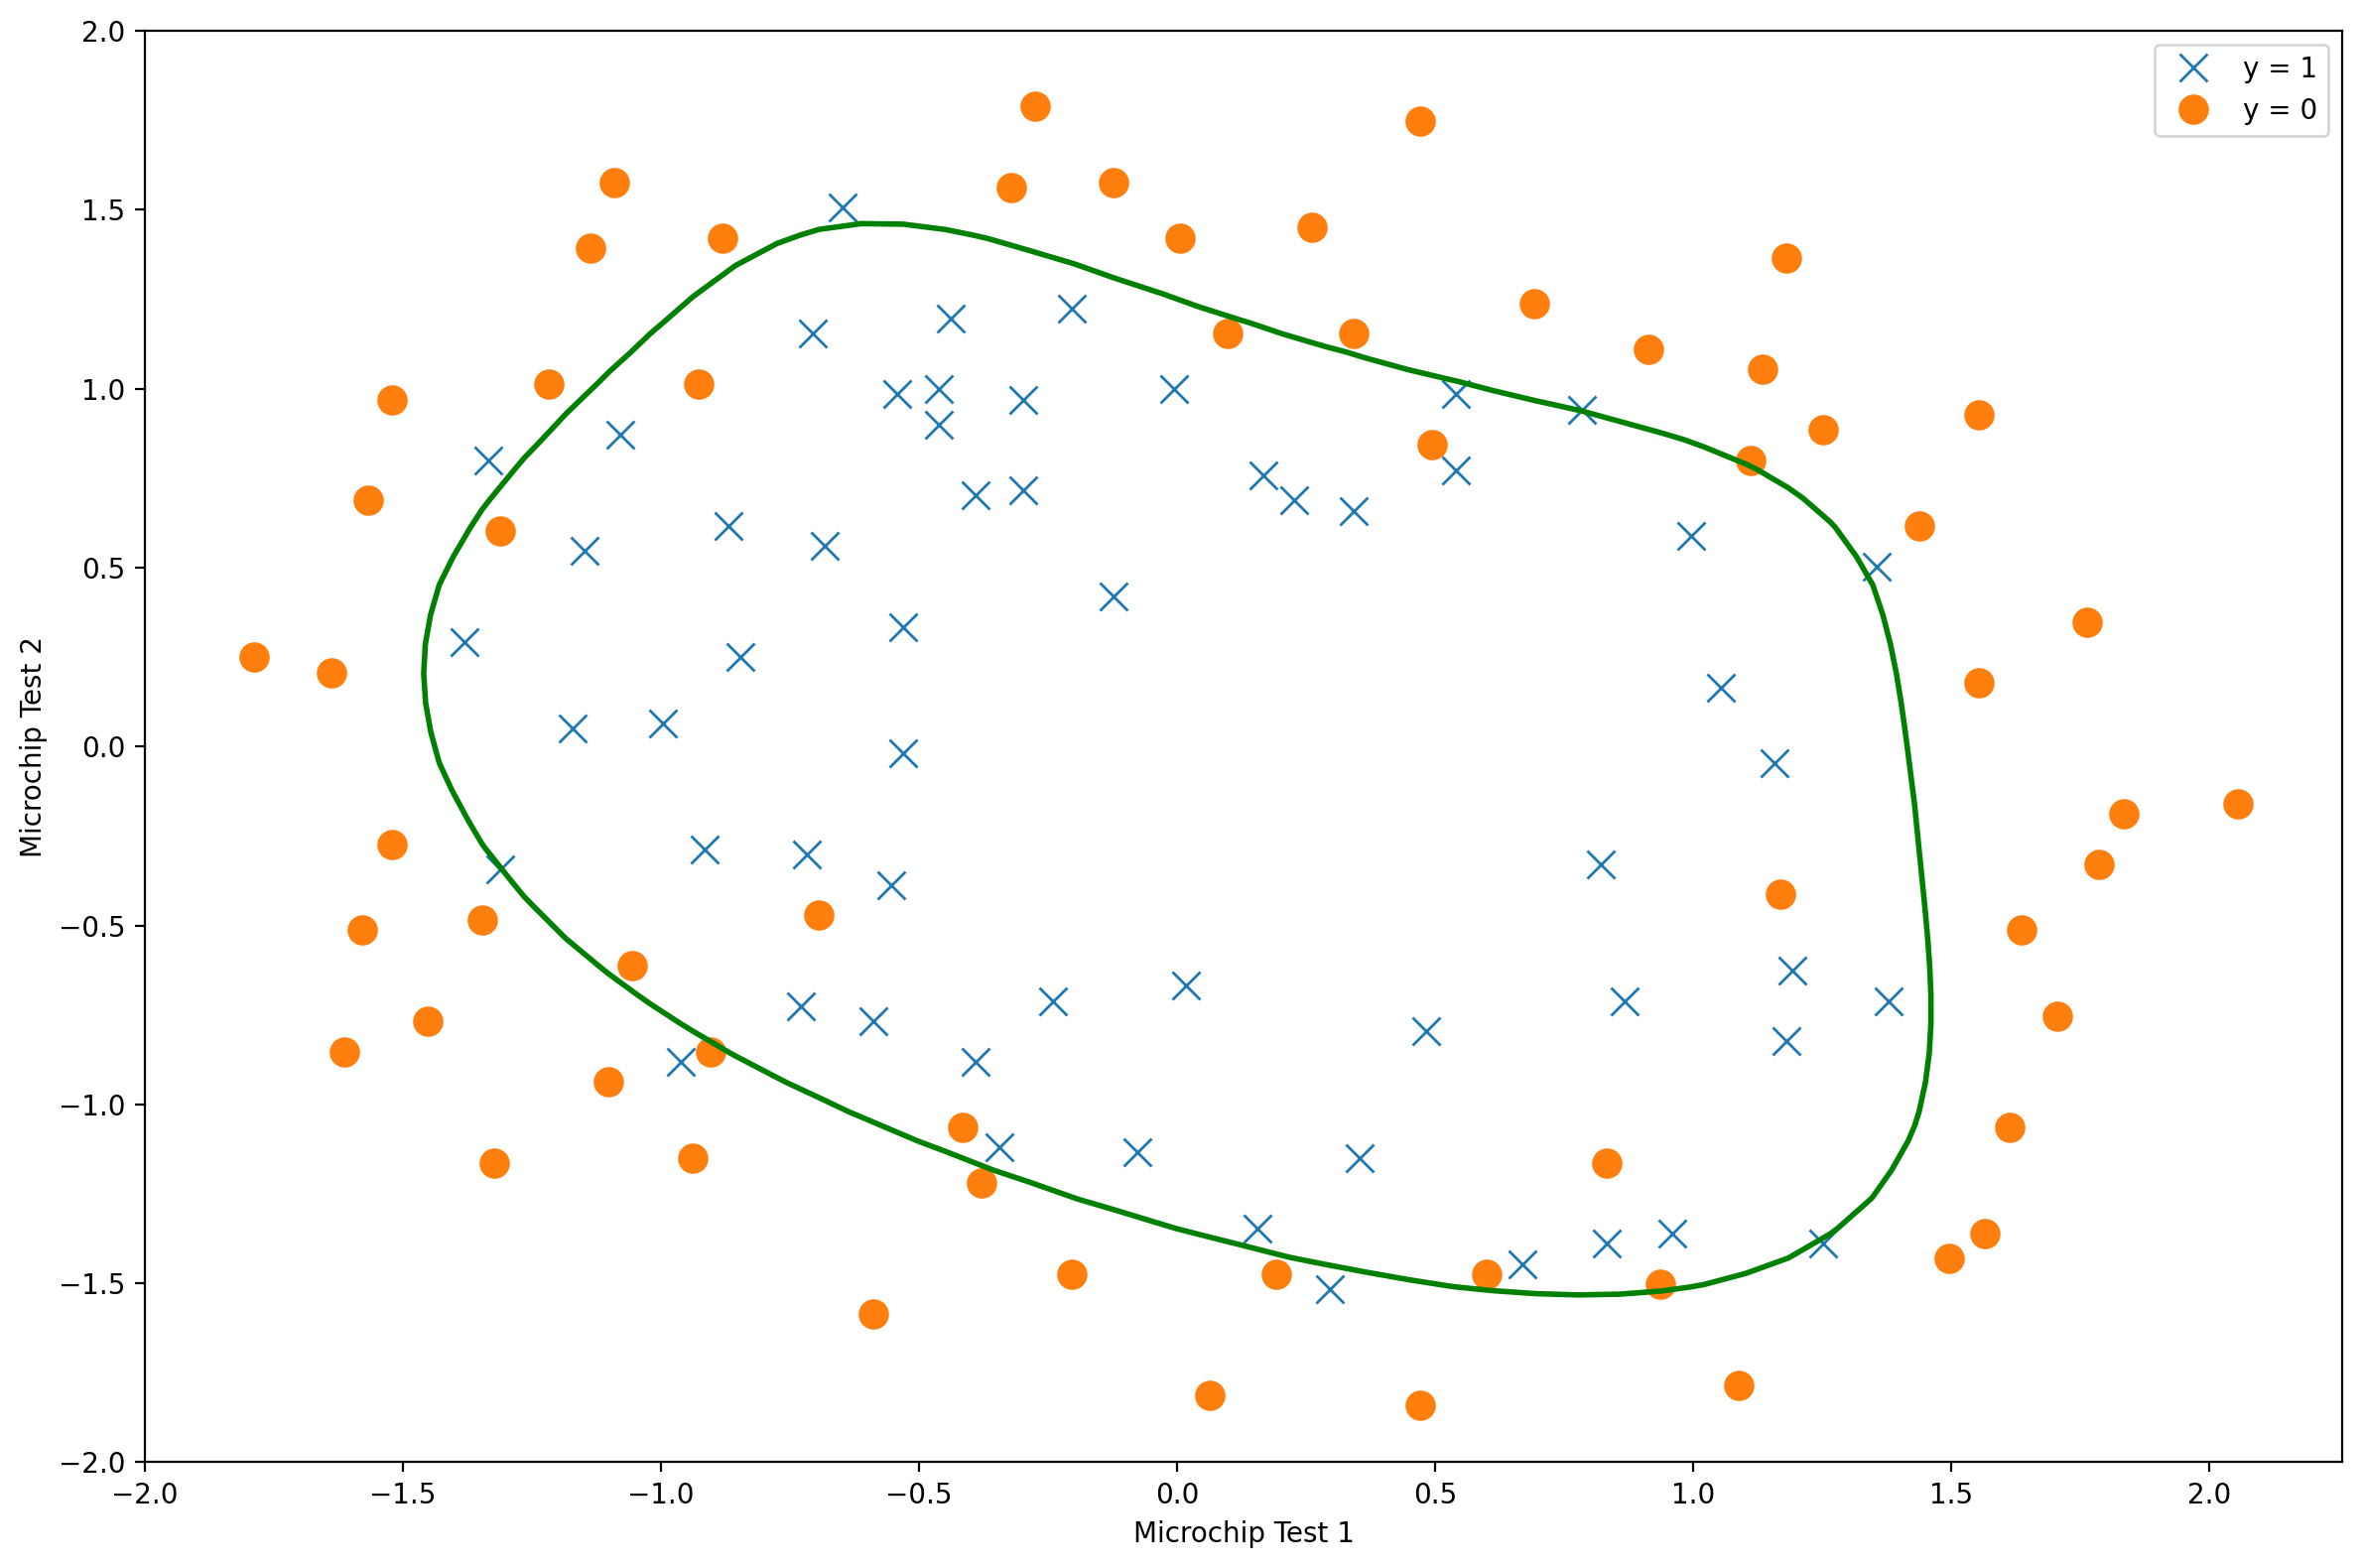

In [27]:
# Initialize fitting parameters
lambda_=1

def computeW(lambda_=1):
    options = {'maxiter': 100}
    initial_w = np.zeros(X_poly.shape[1])

    res = optimize.minimize(costFunctionReg,
                            initial_w,
                            (X_poly, y, lambda_),           
                            jac=True,
                            method='TNC',
                            options=options)

    return res.x, res.fun # (w, cost)
    
w, cost = computeW(lambda_)

# Print theta to screen
print('Cost at w found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.321\n');
assert (abs(cost-0.321) <= 0.01).all() 


print('Print first 3 w\'s:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*w))
print('Expected first 3 w\'s (approx):\n\t[2.874, -0.075, 0.296]')
assert (abs(w[0:3] - np.array([2.874, -0.075, 0.296])) <= 0.01).all() 

# output polynomial decision boundary
utils.plotDecisionBoundary(utils.plotData, w, X_poly, y, degree)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
_=plt.legend(['y = 1', 'y = 0'], loc='upper right')

## Effects of Lambda

In this part of the exercise, you will get to try out different regularization parameters for the dataset to understand how regularization prevents overfitting. Notice the changes in the decision boundary as you vary $\lambda$ (always press "Run Interact"). 

It is an interactive widget. Thus, you have to press "Run Interact" and modify the slider to see any changes.

In [28]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

@interact_manual
def plotLearningRate(lambda_=(0, 50000, 10)):
    w, cost = computeW(lambda_)   
    
    utils.plotDecisionBoundary(utils.plotData, w, X_poly, y, degree)
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend(['y = 1', 'y = 0'])
    plt.grid(False)
    plt.title('lambda = %0.2f, loss = %0.2f, ' % (lambda_, cost))
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    _=plt.legend(['y = 1', 'y = 0'], loc='upper right')

interactive(children=(IntSlider(value=25000, description='lambda_', max=50000, step=10), Button(description='R…

## Task 8: Study the Effects of Lambda
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
Which lambda_ correspond to
    
- overfitting,
- underfitting,
- good fitting.
    
Name one lambda_ for each example.
</div>

In [29]:
# YOUR CODE HERE
'''overfitting: 0
underfitting: 50000
good fitting: 33000'''

'overfitting: 0\nunderfitting: 50000\ngood fitting: 33000'

<hr>

# Sentiment Analysis using Logistic Regression

The **`sentiment`** data set consists of 3000 sentences which come from reviews on `imdb.com`, `amazon.com`, and `yelp.com`. Each sentence is labeled according to whether it comes from a positive review or negative review.

The data set consists of 3000 sentences, each labeled '1' (if it came from a positive review) or '0' (if it came from a negative review). To be consistent with our notation from lecture, we will change the negative review label to '-1'.

We will use **logistic regression** in SciKit-Learn to learn a classifier from this data.

In [30]:
sentences, labels, y = utils.load_sentiment_data()

## Print some sentences
display (pd.DataFrame(data=sentences))

,0
0,So there is no way for me to plug it in here i...
1,"Good case, Excellent value."
2,Great for the jawbone.
3,Tied to charger for conversations lasting more...
4,The mic is great.
...,...
2994,I just got bored watching Jessice Lange take h...
2995,"Unfortunately, any virtue in this film's produ..."
2996,"In a word, it is embarrassing."
2997,Exceptionally bad!


### Training / test split

Finally, we split the data into a training set of 2500 sentences and a test set of 500 sentences.

In [31]:
## Split the data into testing and training sets
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(sentences, y, test_size=1/6, random_state=0)

print("train data: ", train_data.shape)
print("test data: ", test_data.shape)

train data:  (2499,)
test data:  (500,)


### Bag-of-Words

In order to use linear classifiers on our data set, we need to transform our textual data into numeric data. The classical way to do this is known as the _bag of words_ representation. 

In this representation, each word is thought of as corresponding to a number in `{1, 2, ..., V}` where `V` is the size of our vocabulary. And each sentence is represented as a V-dimensional vector $x$, where $x_i$ is the number of times that word $i$ occurs in the sentence.

To do this transformation, we will make use of the `CountVectorizer` class in `scikit-learn`. We will cap the number of features at 4500, meaning a word will make it into our vocabulary only if it is one of the 4500 most common words in the corpus. This is often a useful step as it can weed out spelling mistakes and words which occur too infrequently to be useful.

The `CountVectorizer` further provides options to:

1. Remove punctuation and numbers.
2. Transform all words to lower-case.
3. Remove _stop words_ (very frequent words that do not carry meaning on their own (e.g. 'the'))

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

## Transform to bag of words representation.
vectorizer = CountVectorizer(analyzer = "word", 
                             lowercase=True, 
                             stop_words = 'english', 
                             max_features = 5000)

train_bagOfWords = vectorizer.fit_transform(train_data)
test_bagOfWords = vectorizer.transform(test_data)

scaler = StandardScaler(with_mean=False)
train_bagOfWords = scaler.fit_transform(train_bagOfWords)
test_bagOfWords = scaler.transform(test_bagOfWords)

## Task 9: Fitting a logistic regression model to the training data

To make things a little even easier, we will now use the SciKit functionality in `sklearn.linear_model`. There is a logistic regression classifier built into `scikit-learn` using stochastic gradient descent called `SGDClassifier`. 

Your task is to train a `SGDClassifier` model that has a **train error below $5\%$** and a **test error below $22\%$**. You can learn different values for the hypter-parameters you have seen in the lecture, e.g.:
- `learning_rate`: the learning rate
- `alpha`: 1/lambda we used in regularization
- `penality`: L2 or L1 regularizer

Keep the following parameters of the `SGDClassifier` constant, which are set to 
- `loss = "log"` # for logistic regression
- `random_state = 1` # for reproducability
- `tol=None` # to iterate untill the very end

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
Implement the function  
    
```python
    def myModel(X_train_poly, y_train):      
```

Return:
    Your best model with a **train error below $5\%$** and a **test error below $25\%$**

</div>

You can use Grid-Search to find the parameters but it is sufficient for us if you hard-code the optimal parameters of the classifier.

You are free to use your own `PolynomialFeatures` or use an own `CountVectorizer`, too. But it is not necessary to modify these to solve the exercise.

In [33]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

def myModel(train_bagOfWords, train_labels) :
    clf = SGDClassifier(loss='log_loss', random_state=1, tol=None, n_jobs=-1, learning_rate='adaptive', alpha=0.001, penalty=None, eta0=0.00001) 
    
    # YOUR CODE HERE
    clf.fit(train_bagOfWords, train_labels)
    
    return clf

In [34]:
clf = myModel(train_bagOfWords, train_labels)

print ("Best Model: ", clf)

## Get predictions on training and test data
trainError = 1-(clf.score(train_bagOfWords, train_labels))
print ("\nTraining error: {:.4f}".format(trainError))
testError = 1-(clf.score(test_bagOfWords, test_labels))
print ("Test error: {:.4f}".format(testError))
assert(trainError < 0.05)
assert(testError < 0.22)



Best Model:  SGDClassifier(alpha=0.001, eta0=1e-05, learning_rate='adaptive',
              loss='log_loss', n_jobs=-1, penalty=None, random_state=1,
              tol=None)

Training error: 0.0144
Test error: 0.2040


## Task 10: Words with large Influence on the Prediction
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
In the logistic regression model: Which words are most important for deciding whether a sentence is 'positive'? Think of this in terms of the word's weights in vector $w$.
</div>

In [35]:
# YOUR CODE HERE
'''The most influencial words are those with large positive or negative values in their weight vectors. For a sentence to be 'positive' there should be words with large positive values and fewest possible words with large negative values.'''

"The most influencial words are those with large positive or negative values in their weight vectors. For a sentence to be 'positive' there should be words with large positive values and fewest possible words with large negative values."

## Model Interpretation
Finally, we attempt to partially *interpret* the logistic regression model. We look at those words whose coefficients in `w` have the largest positive or negative values. 

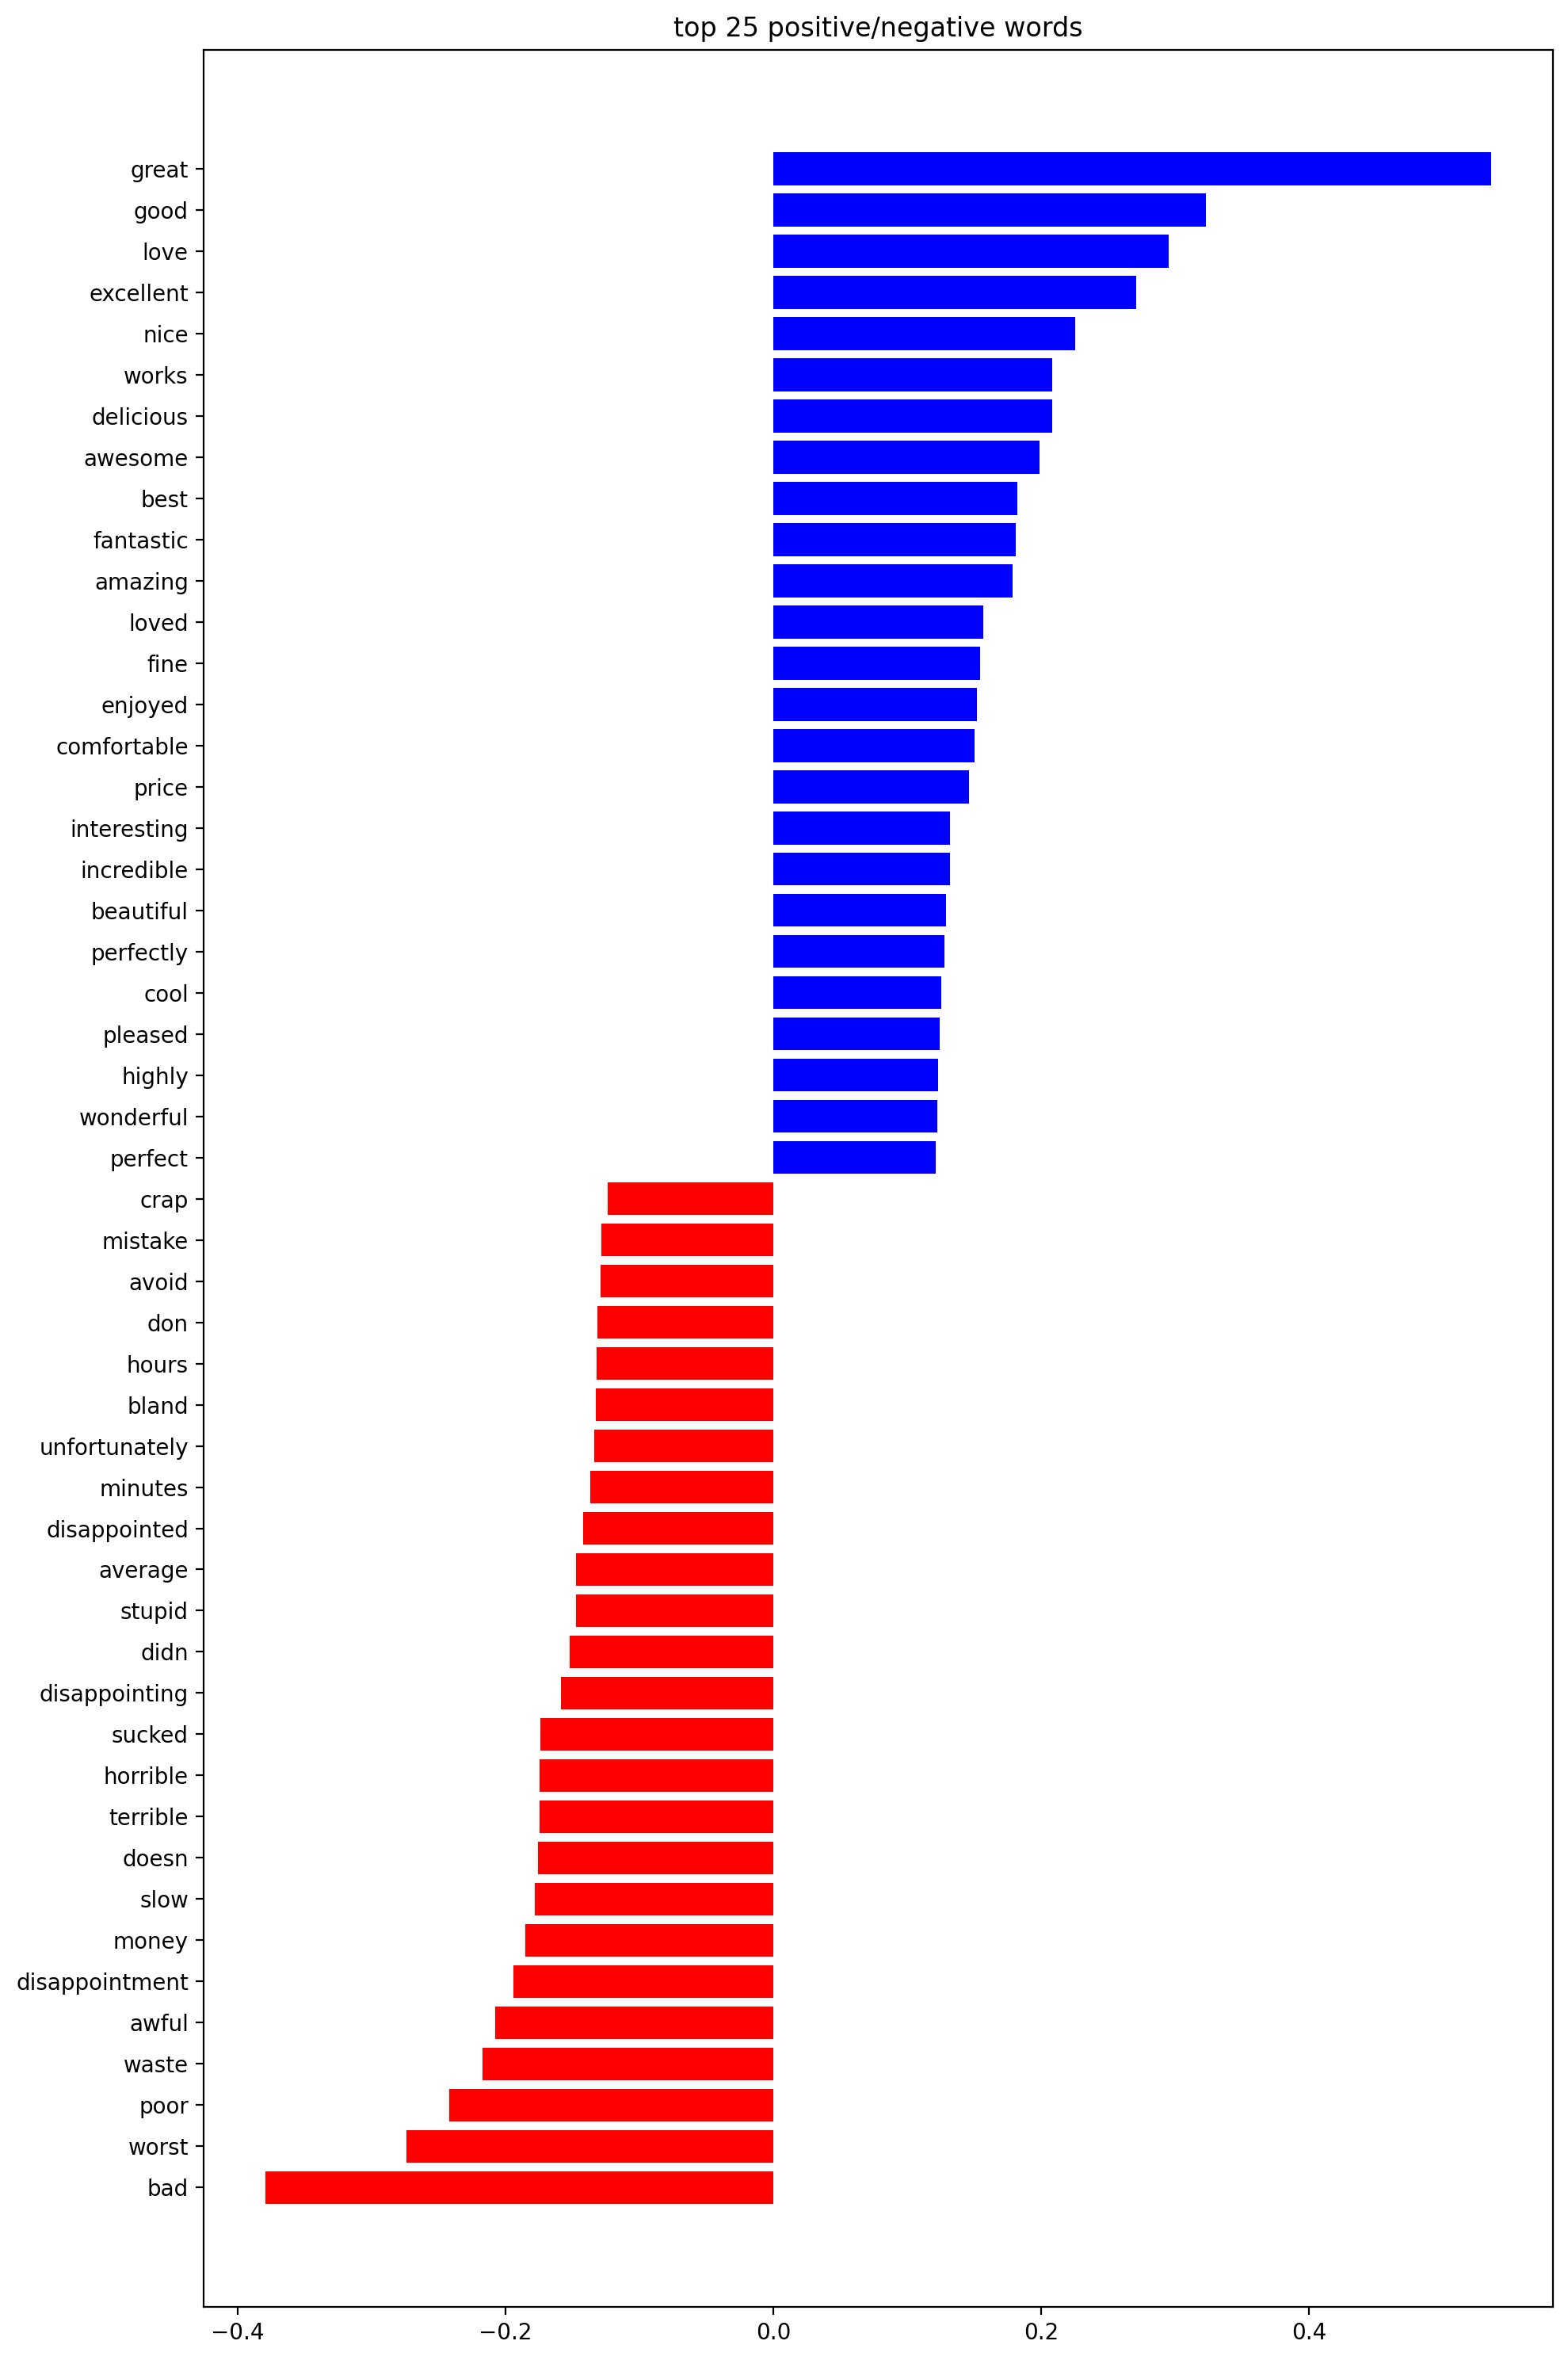

In [36]:
feature_names = vectorizer.get_feature_names_out()
coef_plot = utils.vis_coef(clf, feature_names, topn = 25)  

<hr>